# Dados Tirados do Kaggle
[Link do dataset](https://www.kaggle.com/datasets/tanisha1416/my-redmi-fuel-band-record-tracker-fitbit-dataset)

### IA 1: Calorias Queimadas por Exercicio durante certa duração

In [76]:
import pandas as pd
#Puxando os dados
df = pd.read_csv('./Activity_Dataset_V1.csv')
del df['Unnamed: 0']
#Analise Exploraria
del df['activity_day']
del df['distance']
del df['total_steps']
del df['avg_speed']
del df['avg_cadence']
del df['max_cadence']
del df['avg_pace']
del df['min_heart_rate']
del df['vo2_max(%)']
del df['aerobic(%)']
del df['anaerobic(%)']
del df['intensive(%)']
del df['light(%)']
del df['max_pace']
del df['min_pace']
del df['avg_heart_rate']
del df['max_heart_rate']
df.workout_type.unique()

array(['Freestyle', 'Indoor Cycling', 'Walking', 'Open Water',
       'Outdoor Cycling', 'Outdoor Running', 'Trail Run', 'Pool Swimming',
       'Trekking', 'Treadmill', 'Cricket'], dtype=object)

In [77]:
workout_type_dict = {
    'Freestyle': 1,
    'Indoor Cycling': 2,
    'Walking': 3,
    'Open Water': 4,
    'Outdoor Cycling': 5,
    'Outdoor Running': 6,
    'Trail Run': 7,
    'Pool Swimming': 8,
    'Trekking': 9,
    'Treadmill': 10,
    'Cricket': 11
}
df['workout_type'] = df['workout_type'].map(workout_type_dict)
df

,workout_type,time,calories
0,1,77,123
1,1,96,55
2,2,85,33
3,3,42,82
4,4,36,131
...,...,...,...
995,8,101,313
996,1,61,219
997,1,40,169
998,2,47,52


In [78]:
#Treinando modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['workout_type', 'time']]
y = df['calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [79]:
#Salvando Modelo
import pickle
with open('calorias.pkl', 'wb') as f:
    pickle.dump(model, f)


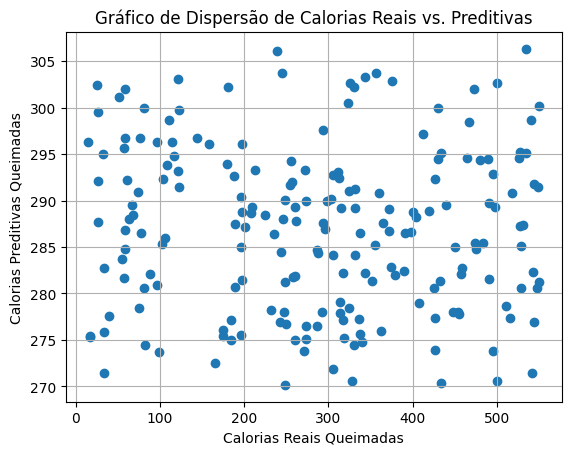

In [80]:
y_pred = model.predict(X_test)
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Calorias Reais Queimadas')
plt.ylabel('Calorias Preditivas Queimadas')
plt.title('Gráfico de Dispersão de Calorias Reais vs. Preditivas')
plt.grid()
plt.show()



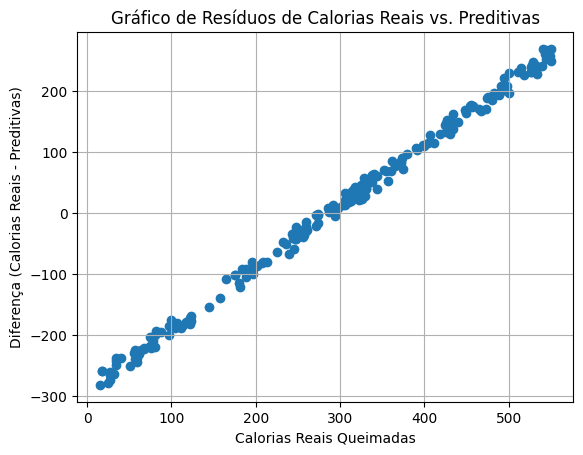

In [81]:
plt.scatter(y_test, y_test - y_pred)
plt.xlabel('Calorias Reais Queimadas')
plt.ylabel('Diferença (Calorias Reais - Preditivas)')
plt.title('Gráfico de Resíduos de Calorias Reais vs. Preditivas')
plt.grid()
plt.show()


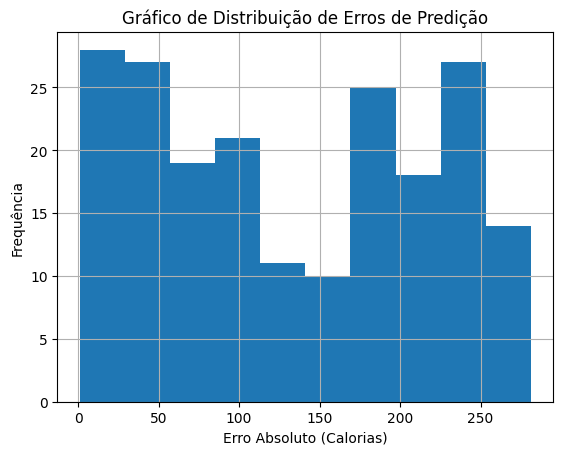

In [82]:
import numpy as np

errors = np.abs(y_test - y_pred)
plt.hist(errors, bins=10)
plt.xlabel('Erro Absoluto (Calorias)')
plt.ylabel('Frequência')
plt.title('Gráfico de Distribuição de Erros de Predição')
plt.grid()
plt.show()


### IA 2: Prevendo passos numa corrida pelo tempo

In [69]:
import pandas as pd
#Puxando os dados
df = pd.read_csv('./Activity_Dataset_V1.csv')
del df['Unnamed: 0']
#Analise Exploraria
del df['activity_day']
del df['calories']
del df['avg_speed']
del df['avg_cadence']
del df['max_cadence']
del df['avg_pace']
del df['min_heart_rate']
del df['vo2_max(%)']
del df['aerobic(%)']
del df['anaerobic(%)']
del df['intensive(%)']
del df['light(%)']
del df['max_pace']
del df['min_pace']
del df['avg_heart_rate']
del df['max_heart_rate']
df = df.dropna()
df.workout_type.unique()

array(['Walking', 'Outdoor Running', 'Trail Run', 'Trekking', 'Treadmill',
       'Cricket'], dtype=object)

In [70]:
workout_type_dict = {
    'Freestyle': 1,
    'Indoor Cycling': 2,
    'Walking': 3,
    'Open Water': 4,
    'Outdoor Cycling': 5,
    'Outdoor Running': 6,
    'Trail Run': 7,
    'Pool Swimming': 8,
    'Trekking': 9,
    'Treadmill': 10,
    'Cricket': 11
}
df['workout_type'] = df['workout_type'].map(workout_type_dict)
df

,workout_type,distance,time,total_steps
3,3,7.91,42,1571.0
7,6,2.94,26,7618.0
8,7,2.87,26,2790.0
10,7,6.31,107,2790.0
11,6,2.37,65,7618.0
...,...,...,...,...
986,7,2.44,22,2790.0
987,9,5.31,44,5028.0
988,3,2.99,104,1571.0
990,10,1.81,58,4550.0


In [71]:
#Treinando modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['workout_type', 'time', 'distance']]
y = df['total_steps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
#Salvando Modelo
import pickle
with open('passos.pkl', 'wb') as f:
    pickle.dump(model, f)


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)


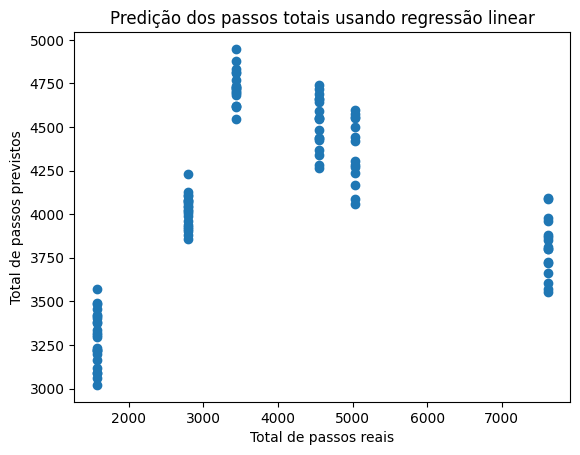

In [74]:
plt.scatter(y_test, y_pred)
plt.xlabel('Total de passos reais')
plt.ylabel('Total de passos previstos')
plt.title('Predição dos passos totais usando regressão linear')
plt.show()

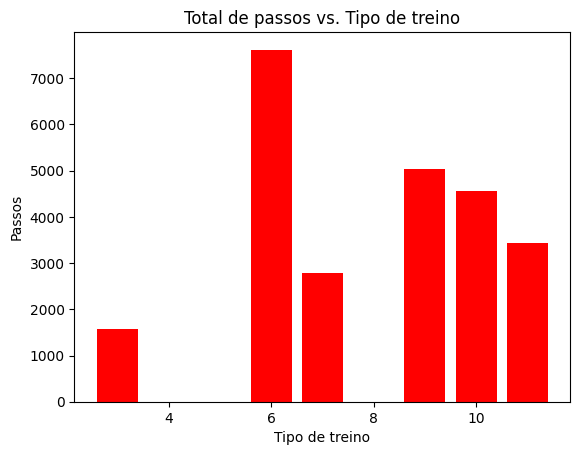

In [75]:
plt.bar(df["workout_type"], df["total_steps"], color="red")
plt.xlabel("Tipo de treino")
plt.ylabel("Passos")
plt.title("Total de passos vs. Tipo de treino")
plt.show()